#  Atividade prática aula 02 <h1>
    Aluno: Kristtopher Kayo Coelho
    Matrícula: ES95031

O bloco abaixo contém as bibliotecas necessárias para executar os demais blocos

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns
import pandas as pd
from itertools import groupby
%matplotlib inline

# Base de dados <h1>
    O trabalho é composto pela avaliação de duas bases de dados, a primeira "out0.txt", é composta por um conjunto de amostra contínua. Ela é representa o consumo energético de um nós sensor em estado <i>idle<i> de funcionamento. A segunda base, out1.txt é composta por um conjunto de amostra discreta. Ela representa a taxa de contágio pelo corona vírus na Cidade de belo horizonte entre os dias 26/02 à 31/03, disponível em:
    https://aredeurbana.com/2020/04/03/download-de-dados-do-covid-19-no-brasil-por-municipio-fevereiro-e-marco-de-2020/

# Parte I <h1>
Implementar funções que plotam CDFs e PMFs a partir de amostras discretas e contínuas passadas como parâmetro de entrada.
## Não são permitidos comandos prontos além dos comandos básicos do python <h3>

# CDF (Função de Distribuição Cumulativa) <h1>
    O gráfico a seguir representa a Função de Distribuição Cumulativa sem o uso de funções prontas do python, ou seja, usando apenas a lógica matemática. A CDF foi plotada como um histograma para o conjunto de dados out0.txt (consumo energético do sensor).

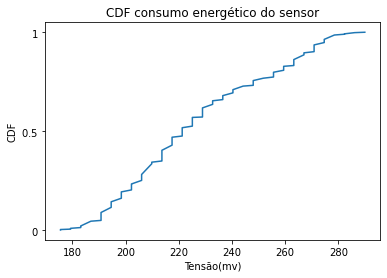

In [27]:
input = open("out0.txt","r")
x = [float(foo) for foo in input.readlines()];
input.close()

x.sort()

total = len(x)
cnt = 0
last = x[0]
xx=[]
yy=[]
for data in x:
    if data != last:
        xx.append(last)
        yy.append(cnt/total)
        cnt += 1
        last = data
    else:
        cnt += 1
xx.append(last)
yy.append(cnt/total)
plt.ylabel('CDF')
plt.xlabel('Tensão(mv)')
plt.title('CDF consumo energético do sensor')
plt.rcParams['xtick.labelsize'] = 10
plt.yticks([0,0.5,1],['$0$','$0.5$','$1$'])
plt.plot(xx, yy)

    O gráfico a seguir representa a Função de Distribuição Cumulativa sem o uso de funções prontas do python, ou seja, usando apenas a lógica matemática. A CDF foi plotada como um histograma para o conjunto de dados out1.txt (contágio corona vírus).

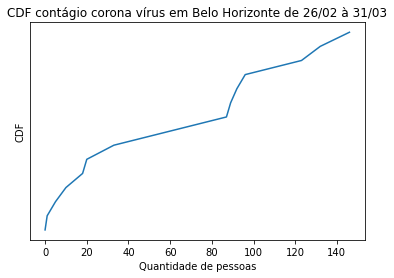

In [28]:
input = open("out1.txt","r")
x = [float(foo) for foo in input.readlines()];
input.close()

x.sort()

total = len(x)
cnt = 0
last = x[0]
xx=[]
yy=[]
for data in x:
    if data != last:
        xx.append(last)
        yy.append(cnt/total)
        cnt += 1
        last = data
    else:
        cnt += 1
x.append(last)
y.append(cnt/total)
plt.ylabel('CDF')
plt.xlabel("Quantidade de pessoas")
plt.title('CDF contágio corona vírus em Belo Horizonte de 26/02 à 31/03')
plt.rcParams['xtick.labelsize'] = 10
plt.yticks([0,0.5,1],['$0$','$0.5$','$1$'])
plt.plot(xx, yy)

# PMF (Função Massa de Probabilidade) <h1>
    O gráfico a seguir representa a Função Massa de Probabilidade sem o uso de funções prontas do python, ou seja, usando apenas a lógica matemática. A PMF é direciona a aplicações em análises de variáveis discreta, entretanto a lógica aplicada pode se extender a amostra contínua, principalmente a título de curiosidade. A PMF representa a probabilidade para cada amostra do conjunto de dados out0.txt (consumo energético do sensor). O gráfico ilustra o fato que a maioria das amostras tem menores probabilidades de acontecer, ou seja é uma amostra bastatente variável, principalmente por sua característica contínua.

Text(0.5, 1.0, 'PMF consumo energético do sensor')

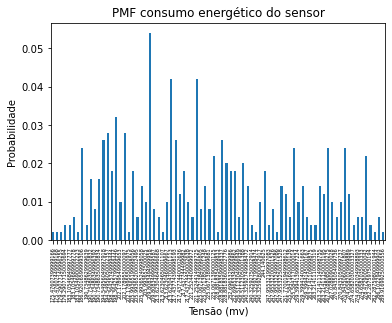

In [48]:
input = open("out0.txt","r")
x = [float(foo) for foo in input.readlines()];
input.close()

xk = np.unique(x)
pk=[]
for j in [len(list(group)) for key, group in groupby(x)]:
    pk.append(j/len(x))

ser = pd.Series(pk,xk)
plt.rcParams['xtick.labelsize'] = 5
ser.plot(kind='bar', rot=90)
plt.ylabel("Probabilidade")
plt.xlabel("Tensão (mv)")
plt.title('PMF consumo energético do sensor')

O gráfico a seguir representa a Função Massa de Probabilidade sem o uso de funções prontas do python, ou seja, usando apenas a lógica matemática. A PMF representa a probabilidade para cada amostra do conjunto de dados out1.txt (contágio corona vírus). Como estes dados correspondem à fase inicial do contágio, a maior probablilidade de uma amostra for igual a zero é maior, uma vez que o contágio se iniciou 20 dias após o inicio da amostragem. Além disso a amostragem compreende um período curto, de 36 dias.

Text(0.5, 1.0, 'PMF contágio corona vírus em Belo Horizonte de 26/02 à 31/03')

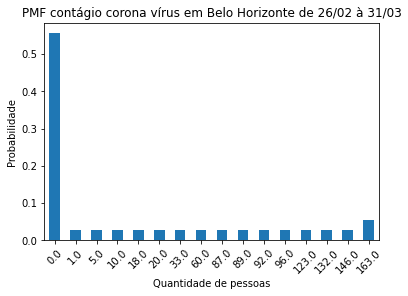

In [49]:
input = open("out1.txt","r")
x = [float(foo) for foo in input.readlines()];
input.close()

xk = np.unique(x)
pk=[]
for j in [len(list(group)) for key, group in groupby(x)]:
    pk.append(j/len(x))

ser = pd.Series(pk,xk)
plt.rcParams['xtick.labelsize'] = 10
ser.plot(kind='bar', rot=45)
plt.ylabel("Probabilidade")
plt.xlabel("Quantidade de pessoas")
plt.title('PMF contágio corona vírus em Belo Horizonte de 26/02 à 31/03')

# Parte II <h1>
    Repetir a parte 1 com os mesmos parâmetros de entrada, mas usando funções prontas de bibliotecas python para curvas empíricas 
    **ATENÇÃO:** Diferente da parte 1, plotar também a PDF (além da CDF ePMF) com as funções prontas das bibliotecas.

# CDF (Função de Distribuição Cumulativa) por histograma <h1>
    O gráfico a seguir representa a Função de Distribuição Cumulativa com fuções prontas python. Os dados foram ordenados e convertidos em uma série do pandas. A CDF foi plotada como um histograma com o paramentro cumulative = True para o conjunto de dados out0.txt (consumo energético do sensor).

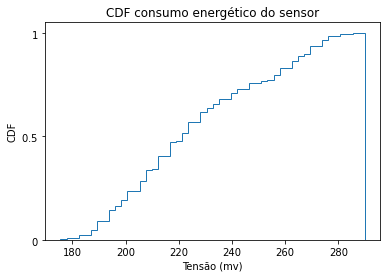

In [50]:
input = open("out0.txt","r")
x = [float(foo.replace('\n','')) for foo in input.readlines()];
input.close()
x.sort()

ser = pd.Series(x)
plt.ylabel('CDF')
plt.xlabel('Tensão (mv)')
plt.title('CDF consumo energético do sensor')
plt.rcParams['xtick.labelsize'] = 6
plt.yticks([0,len(x)//2,len(x)],['$0$','$0.5$','$1$'])
ser.hist(cumulative=True, bins=len(x)//10, grid=False, histtype='step', fill = None)

    O gráfico a seguir representa a Função de Distribuição Cumulativa com fuções prontas python. Os dados foram ordenados e convertidos em uma série do pandas. A CDF foi plotada como um histograma com o paramentro cumulative = True para o conjunto de dados out1.txt (contágio corona vírus).

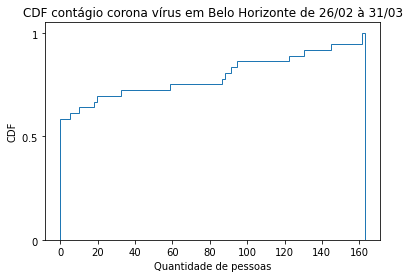

In [55]:
input = open("out1.txt","r")
x = [float(foo.replace('\n','')) for foo in input.readlines()];
input.close()
x.sort()

ser = pd.Series(x)
plt.ylabel('CDF')
plt.xlabel("Quantidade de pessoas")
plt.title('CDF contágio corona vírus em Belo Horizonte de 26/02 à 31/03')
plt.rcParams['xtick.labelsize'] = 10
plt.yticks([0,len(x)//2,len(x)],['$0$','$0.5$','$1$'])
ser.hist(cumulative=True, bins=100, grid=False, histtype='step', fill = None)

# PDF (Função Densidade de Probabilidade)<h1>
    O gráfico a seguir representa a Função Densidade de Probabilidade. A PDF foi plotada com o auxilio da função plot.kde() para o conjunto de dados out0.txt (consumo energético do sensor). A estimativa de densidade de kernel (KDE) é uma maneira não paramétrica de estimar a função de densidade de probabilidade (PDF) de uma variável aleatória. 

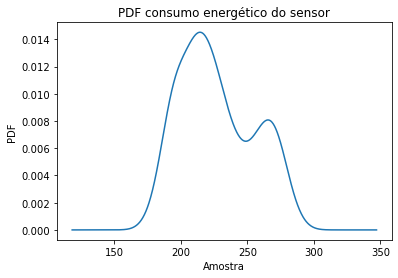

In [52]:
input = open("out0.txt","r")
x = [float(foo) for foo in input.readlines()];
input.close()

ser = pd.Series(x)
ser.plot.kde()
plt.ylabel('PDF')
plt.xlabel('Amostra')
plt.title('PDF consumo energético do sensor')
plt.show()

O gráfico a seguir representa a Função Densidade de Probabilidade. A PDF foi plotada com o auxilio da função plot.kde() para o conjunto de dados out1.txt (contágio corona vírus).

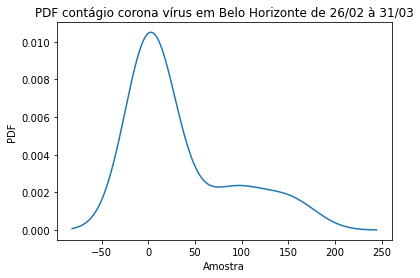

In [53]:
input = open("out1.txt","r")
x = [float(foo) for foo in input.readlines()];
input.close()

ser = pd.Series(x)
ser.plot.kde()
plt.ylabel('PDF')
plt.xlabel('Amostra')
plt.title('PDF contágio corona vírus em Belo Horizonte de 26/02 à 31/03')
plt.show()

# PMF (Função Massa de Probabilidade) <h1>
    O gráfico a seguir representa a Função Massa de Probabilidade aplicada a um conjunto de amostras discretas. A PMF representa a probabilidade para cada amostra do conjunto de dados out1.txt (contágio corona vírus), a qual manteve desempenho equivalente à apresentada anteriormente. A função pronta do python utilizada para este fim é a scipy.stats.binom.pmf.

[]

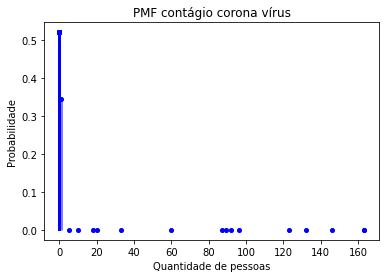

In [54]:
input = open("out1.txt","r")
x = [float(foo) for foo in input.readlines()];
input.close()

fig, ax = plt.subplots(1, 1)
ax.plot(x, scipy.stats.binom.pmf(x, len(x), 0.018), 'bo', ms=4, label='binom pmf')
ax.vlines(x, 0, scipy.stats.binom.pmf(x, len(x), 0.018), colors='b', lw=3, alpha=0.5)
plt.title('PMF contágio corona vírus')
plt.rcParams['xtick.labelsize'] = 10
plt.ylabel("Probabilidade")
plt.xlabel("Quantidade de pessoas")
ax.plot()